In [5]:
import warnings
warnings.filterwarnings("ignore")

from data_name_lists import index, share_name, mutual_funds
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's create first a combined csv of gold bonds

In [6]:
paths = ['../Data/Gold Bonds/SGBNOV258-GB-01-01-2019-to-01-01-2020.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2020-to-01-01-2021.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2021-to-01-01-2022.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2022-to-01-01-2023.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2023-to-01-01-2024.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2024-to-11-11-2024.csv',    
    ]

combined_df = pd.concat((pd.read_csv(path) for path in paths), ignore_index=True)

print(combined_df.head())
print(combined_df.tail())
# all_files = glob.glob(path + "/*.csv")
# all_files
combined_df.to_csv("../Data/Gold_Bonds.csv", index=False)

         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  30-Dec-2019      GB  3,700.00  3,700.00  3,700.00     3,599.50  3,700.00   
1  23-Dec-2019      GB  3,750.00  3,750.00  3,599.00     3,589.00  3,599.00   
2  17-Dec-2019      GB  3,590.00  3,590.00  3,589.00     3,580.05  3,589.00   
3  16-Dec-2019      GB  3,580.05  3,580.05  3,580.05     3,580.00  3,580.05   
4  12-Dec-2019      GB  3,562.00  3,580.00  3,562.00     3,585.00  3,580.00   

     close      vwap     52W H     52W L  VOLUME        VALUE   No of trades   
0  3,700.00  3,700.00  3,840.00  2,725.00       6    22,200.00              1  
1  3,599.50  3,616.33  3,840.00  2,655.29      45  1,62,735.00              5  
2  3,589.00  3,589.40  3,840.00  2,655.29      25    89,735.00              3  
3  3,580.05  3,580.05  3,840.00  2,655.29       1     3,580.05              1  
4  3,580.00  3,565.00  3,840.00  2,655.29       6    21,390.00              2  
           Date  series      OPEN      HIGH  

### Storing all csv in dictionary. So, we don't need to read everytime

In [7]:
all_index = {}

for ind in index:
    file_name = '../Data/Index/' + ind.replace("^", "").replace(".NS", "") + '.csv'
    all_index[ind] = pd.read_csv(file_name)

In [8]:
all_index['^BSESN']

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,0.0,0.0
1,1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,0.0,0.0
2,1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,0.0,0.0
3,1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,0.0,0.0
4,1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,0.0,0.0
...,...,...,...,...,...,...,...,...
6753,2024-12-02 00:00:00+05:30,79743.867188,80337.820312,79308.953125,80248.078125,7300,0.0,0.0
6754,2024-12-03 00:00:00+05:30,80529.203125,80949.101562,80244.781250,80845.750000,9400,0.0,0.0
6755,2024-12-04 00:00:00+05:30,81036.218750,81245.390625,80630.531250,80956.328125,7200,0.0,0.0
6756,2024-12-05 00:00:00+05:30,81182.742188,82317.742188,80467.367188,81765.859375,7500,0.0,0.0


In [9]:
all_nifty_50_stocks = {}

for share in share_name:
    file_name = '../Data/Stocks/' + share.replace(".NS", "") + '.csv'
    all_nifty_50_stocks[share] = pd.read_csv(file_name)

In [10]:
all_mutual_funds = {}

for fund in mutual_funds:
    file_name = '../Data/Mutual Funds/' + fund.replace(".NS", "").replace(".BO", "") + '.csv'
    all_mutual_funds[fund] = pd.read_csv(file_name)

# 1. Data Cleaning

In [11]:
def check_missing_and_duplicates(stock_name, df):
    print(f'Name: {stock_name}')
    
    # Check for missing values
    missing_count = df.isnull().sum().sum()
    print(f'missing_count: {missing_count}')
    if missing_count > 0:
        print(f"{stock_name}: Missing values found - {missing_count} total missing")
        print("----------------------------------------------------------------")


    # Check for duplicate values
    duplicate_count = df.duplicated().sum()
    print(f'duplicate_count: {duplicate_count}')
    if duplicate_count > 0:
        print(f"{stock_name}: Duplicate values found - {duplicate_count} duplicates")
        print("----------------------------------------------------------------")
    
    print("----------------------------------------------------------------")

## Index

In [12]:
for ind in index:
    check_missing_and_duplicates(ind, all_index[ind])

Name: ^NSEI
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^NSEBANK
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXIT
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^BSESN
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: NIFTY_MIDCAP_100.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXPSUBANK
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXAUTO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: NIFTY_FIN_SERVICE.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


## Stock data

In [13]:
for share in share_name:
    check_missing_and_duplicates(share, all_nifty_50_stocks[share])

Name: ADANIENT.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ASIANPAINT.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: AXISBANK.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BAJAJ-AUTO.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BAJFINANCE.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BAJAJFINSV.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BHARTIARTL.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BPCL.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: BRITANNIA.NS
missing_count: 0
duplic

## Mutual Funds

In [14]:
for fund in mutual_funds:
    check_missing_and_duplicates(fund, all_mutual_funds[fund])

Name: 0P00005WL6.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: UTINEXT50.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0000MLHH.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0000KV39.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P00009J3K.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001BAB5.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001EI18.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001BA1R.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P00005WEY.BO
missing_count

## FD Returns

In [15]:
fd_df = pd.read_csv('../Data/FD_Returns.csv')

check_missing_and_duplicates('F.D. Return', fd_df)

Name: F.D. Return
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


## Gold Bonds

In [16]:
GB_df = pd.read_csv('../Data/Gold_Bonds.csv')

check_missing_and_duplicates('Gold Bonds', GB_df)

Name: Gold Bonds
missing_count: 0
duplicate_count: 10
Gold Bonds: Duplicate values found - 10 duplicates
----------------------------------------------------------------
----------------------------------------------------------------


In [17]:
len(GB_df[GB_df.duplicated()])

10

In [18]:
GB_df[GB_df.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
197,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
198,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
199,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
200,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
201,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
209,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
210,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
211,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
212,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
343,01-Jan-2021,GB,"4,860.00","4,933.99","4,860.00","4,935.17","4,933.99","4,933.99","4,912.11","5,399.00","3,615.00",74,"3,63,495.90",15


In [19]:
GB_df_cleaned = GB_df.drop_duplicates()

In [20]:
check_missing_and_duplicates('Gold Bonds', GB_df_cleaned)

Name: Gold Bonds
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


In [21]:
# Removing extra space after each column
GB_df_cleaned.columns = GB_df_cleaned.columns.str.strip()

# 2. Feature Engineering

In [22]:
for ind in index:
    all_index[ind]['Percent change in price'] = all_index[ind].Close.pct_change()
    all_index[ind]['Percent change in volume'] = all_index[ind].Volume.pct_change()

In [23]:
for share in share_name:
    all_nifty_50_stocks[share]['Percent change in price'] = all_nifty_50_stocks[share].Close.pct_change()
    all_nifty_50_stocks[share]['Percent change in volume'] = all_nifty_50_stocks[share].Volume.pct_change()

In [24]:
for fund in mutual_funds:
    all_mutual_funds[fund]['Percent change in price'] = all_mutual_funds[fund].Close.pct_change()
    all_mutual_funds[fund]['Percent change in volume'] = all_mutual_funds[fund].Volume.pct_change()

# 3. Basic Statistical Summary

## Index

In [25]:
index_name = '^NSEBANK'
df = all_index[index_name]

print(f"\nInfo for {index_name}:")
print(df.info())
print(f"\nDescription for {index_name}:")
display(df.describe())


Info for ^NSEBANK:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3949 non-null   object 
 1   Open                      3949 non-null   float64
 2   High                      3949 non-null   float64
 3   Low                       3949 non-null   float64
 4   Close                     3949 non-null   float64
 5   Volume                    3949 non-null   int64  
 6   Dividends                 3949 non-null   float64
 7   Stock Splits              3949 non-null   float64
 8   Percent change in price   3948 non-null   float64
 9   Percent change in volume  1395 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 308.6+ KB
None

Description for ^NSEBANK:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent change in price,Percent change in volume
count,3949.000000,3949.000000,3949.000000,3949.000000,3.949000e+03,3949.0,3949.0,3948.000000,1395.000000
mean,22101.088783,22271.680143,21901.919856,22088.557295,6.393669e+05,0.0,0.0,0.000691,inf
std,13344.638873,13406.578175,13269.280829,13339.645954,2.897075e+07,0.0,0.0,0.018567,NaN
min,3385.360435,3446.709937,3314.511523,3339.661133,0.000000e+00,0.0,0.0,-0.167340,-1.000000
25%,10425.728423,10525.577971,10307.479970,10419.779297,0.000000e+00,0.0,0.0,-0.007528,-0.197877
50%,18890.529880,19054.079721,18706.031839,18873.730469,0.000000e+00,0.0,0.0,0.000829,-0.002904
75%,31597.683236,31851.078726,31328.235551,31647.283203,1.058000e+05,0.0,0.0,0.008814,0.242975
max,54338.699219,54467.351562,54010.898438,54375.351562,1.798102e+09,0.0,0.0,0.194376,inf


## Stock data

In [26]:
for stock_name in ['ONGC.NS', 'RELIANCE.NS']:
    stock_df = all_nifty_50_stocks[stock_name]
    print(f"\nInfo for {stock_name}:")
    print(stock_df.info())
    print(f"\nDescription for {stock_name}:")
    display(stock_df.describe())


Info for ONGC.NS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7265 non-null   object 
 1   Open                      7265 non-null   float64
 2   High                      7265 non-null   float64
 3   Low                       7265 non-null   float64
 4   Close                     7265 non-null   float64
 5   Volume                    7265 non-null   int64  
 6   Dividends                 7265 non-null   float64
 7   Stock Splits              7265 non-null   float64
 8   Percent change in price   7264 non-null   float64
 9   Percent change in volume  7257 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 567.7+ KB
None

Description for ONGC.NS:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent change in price,Percent change in volume
count,7265.000000,7265.000000,7265.000000,7265.000000,7.265000e+03,7265.000000,7265.000000,7264.000000,7257.000000
mean,77.616592,78.712544,76.362339,77.474624,8.692949e+06,0.020353,0.000688,0.001062,inf
std,59.639635,60.357907,58.740974,59.502937,1.151160e+07,0.262269,0.034201,0.033263,NaN
min,3.150901,3.394798,3.150901,3.309104,0.000000e+00,0.000000,0.000000,-0.356677,-1.000000
25%,15.923524,16.106554,15.718967,15.926121,1.821207e+06,0.000000,0.000000,-0.010944,-0.317285
50%,85.102251,86.794069,83.357876,84.775932,6.050196e+06,0.000000,0.000000,0.000000,-0.010813
75%,112.379368,113.890268,110.695778,112.088448,1.117236e+07,0.000000,0.000000,0.011816,0.447812
max,333.274308,334.145987,326.542944,330.998230,2.922325e+08,6.750000,2.000000,0.500000,inf



Info for RELIANCE.NS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7265 non-null   object 
 1   Open                      7265 non-null   float64
 2   High                      7265 non-null   float64
 3   Low                       7265 non-null   float64
 4   Close                     7265 non-null   float64
 5   Volume                    7265 non-null   int64  
 6   Dividends                 7265 non-null   float64
 7   Stock Splits              7265 non-null   float64
 8   Percent change in price   7264 non-null   float64
 9   Percent change in volume  7257 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 567.7+ KB
None

Description for RELIANCE.NS:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent change in price,Percent change in volume
count,7265.000000,7265.000000,7265.000000,7265.000000,7.265000e+03,7265.000000,7265.000000,7264.000000,7257.000000
mean,300.966964,304.271578,297.424257,300.714431,5.977292e+07,0.012927,0.001101,0.001476,inf
std,395.478140,399.197655,391.528186,395.211875,1.023794e+08,0.249349,0.046919,0.047871,NaN
min,2.702935,2.715301,2.686153,2.715301,0.000000e+00,0.000000,0.000000,-0.769945,-1.000000
25%,15.837015,16.118619,15.614737,15.860170,1.376733e+07,0.000000,0.000000,-0.010604,-0.249834
50%,168.513932,170.847915,166.037810,168.271332,2.455150e+07,0.000000,0.000000,0.000272,-0.014853
75%,342.128824,345.628846,339.755300,342.216339,6.240329e+07,0.000000,0.000000,0.011623,0.308755
max,1593.595776,1597.916527,1574.774022,1590.069946,1.448889e+09,10.000000,2.000000,3.374775,inf


## Mutual Funds

In [27]:
for mf_name in ['0P0001EI18.BO', '0P0000XUYS.BO']:
    mf_df = all_mutual_funds[mf_name]
    print(f"\nInfo for {mf_name}:")
    print(mf_df.info())
    print(f"\nDescription for {mf_name}:")
    display(mf_df.describe())


Info for 0P0001EI18.BO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1703 non-null   object 
 1   Open                      1703 non-null   float64
 2   High                      1703 non-null   float64
 3   Low                       1703 non-null   float64
 4   Close                     1703 non-null   float64
 5   Volume                    1703 non-null   int64  
 6   Dividends                 1703 non-null   float64
 7   Stock Splits              1703 non-null   float64
 8   Capital Gains             1703 non-null   float64
 9   Percent change in price   1702 non-null   float64
 10  Percent change in volume  0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.5+ KB
None

Description for 0P0001EI18.BO:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent change in price,Percent change in volume
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.0,1703.0,1703.0,1703.0,1702.000000,0.0
mean,76.843036,76.843036,76.843036,76.843036,0.0,0.0,0.0,0.0,0.000531,NaN
std,23.214913,23.214913,23.214913,23.214913,0.0,0.0,0.0,0.0,0.008028,NaN
min,41.063000,41.063000,41.063000,41.063000,0.0,0.0,0.0,0.0,-0.091727,NaN
25%,54.800999,54.800999,54.800999,54.800999,0.0,0.0,0.0,0.0,-0.003141,NaN
50%,76.898003,76.898003,76.898003,76.898003,0.0,0.0,0.0,0.0,0.000795,NaN
75%,91.813499,91.813499,91.813499,91.813499,0.0,0.0,0.0,0.0,0.004719,NaN
max,128.026001,128.026001,128.026001,128.026001,0.0,0.0,0.0,0.0,0.047905,NaN



Info for 0P0000XUYS.BO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1702 non-null   object 
 1   Open                      1702 non-null   float64
 2   High                      1702 non-null   float64
 3   Low                       1702 non-null   float64
 4   Close                     1702 non-null   float64
 5   Volume                    1702 non-null   int64  
 6   Dividends                 1702 non-null   float64
 7   Stock Splits              1702 non-null   float64
 8   Capital Gains             1702 non-null   float64
 9   Percent change in price   1701 non-null   float64
 10  Percent change in volume  0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.4+ KB
None

Description for 0P0000XUYS.BO:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent change in price,Percent change in volume
count,1702.000000,1702.000000,1702.000000,1702.000000,1702.0,1702.0,1702.0,1702.0,1701.000000,0.0
mean,35.429963,35.429963,35.429963,35.429963,0.0,0.0,0.0,0.0,0.000586,NaN
std,12.425735,12.425735,12.425735,12.425735,0.0,0.0,0.0,0.0,0.011781,NaN
min,16.951799,16.951799,16.951799,16.951799,0.0,0.0,0.0,0.0,-0.114761,NaN
25%,25.495950,25.495950,25.495950,25.495950,0.0,0.0,0.0,0.0,-0.004961,NaN
50%,34.074350,34.074350,34.074350,34.074350,0.0,0.0,0.0,0.0,0.001706,NaN
75%,39.665624,39.665624,39.665624,39.665624,0.0,0.0,0.0,0.0,0.007096,NaN
max,71.898102,71.898102,71.898102,71.898102,0.0,0.0,0.0,0.0,0.063372,NaN


## FD Returns

In [28]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Bank Name                            8 non-null      object 
 1   Return Rate for Adults (%)           8 non-null      float64
 2   Return Rate for Senior Citizens (%)  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [29]:
fd_df.describe()

,Return Rate for Adults (%),Return Rate for Senior Citizens (%)
count,8.000000,8.000000
mean,6.837500,7.300000
std,0.204852,0.198206
min,6.600000,7.100000
25%,6.700000,7.200000
50%,6.800000,7.250000
75%,6.887500,7.312500
max,7.250000,7.750000


## Gold Bonds

In [30]:
GB_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          683 non-null    object
 1   series        683 non-null    object
 2   OPEN          683 non-null    object
 3   HIGH          683 non-null    object
 4   LOW           683 non-null    object
 5   PREV. CLOSE   683 non-null    object
 6   ltp           683 non-null    object
 7   close         683 non-null    object
 8   vwap          683 non-null    object
 9   52W H         683 non-null    object
 10  52W L         683 non-null    object
 11  VOLUME        683 non-null    object
 12  VALUE         683 non-null    object
 13  No of trades  683 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 80.0+ KB


In [31]:
GB_df_cleaned['Date'] = pd.to_datetime(GB_df_cleaned['Date'])

numeric_columns = ["OPEN", "HIGH", "LOW", "PREV. CLOSE", "ltp", "close", 
                   "vwap", "52W H", "52W L", "VOLUME", "VALUE"]

for col in numeric_columns:
    GB_df_cleaned[col] = pd.to_numeric(GB_df_cleaned[col].str.replace(',', ''), errors='coerce')

In [32]:
GB_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          683 non-null    datetime64[ns]
 1   series        683 non-null    object        
 2   OPEN          683 non-null    float64       
 3   HIGH          683 non-null    float64       
 4   LOW           683 non-null    float64       
 5   PREV. CLOSE   683 non-null    float64       
 6   ltp           683 non-null    float64       
 7   close         683 non-null    float64       
 8   vwap          683 non-null    float64       
 9   52W H         683 non-null    float64       
 10  52W L         683 non-null    float64       
 11  VOLUME        683 non-null    int64         
 12  VALUE         683 non-null    float64       
 13  No of trades  683 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 80.0+ KB


In [33]:
GB_df_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,683,2022-01-18 16:26:42.342606080,2019-01-03 00:00:00,2020-09-11 00:00:00,2022-01-20 00:00:00,2023-05-30 12:00:00,2024-11-07 00:00:00,NaN
OPEN,683.0,5154.303177,2751.25,4655.0,4901.0,5874.645,8200.0,1149.568517
HIGH,683.0,5172.663075,2751.25,4670.0,4920.0,5880.0,8236.0,1152.886668
LOW,683.0,5143.626457,2725.0,4650.0,4900.0,5870.5,8200.0,1150.33437
PREV. CLOSE,683.0,5154.649253,2751.25,4654.5,4910.0,5873.995,8235.5,1151.614367
ltp,683.0,5162.591977,2751.25,4655.025,4910.0,5874.145,8235.0,1153.28967
close,683.0,5162.438419,2751.25,4655.025,4910.0,5874.145,8235.5,1153.519266
vwap,683.0,5158.348433,2751.25,4654.005,4905.0,5873.995,8221.2,1151.194181
52W H,683.0,5421.509151,3100.0,4977.0,5399.0,6100.01,8236.0,1117.569682
52W L,683.0,4215.587306,2511.29,3428.0,4550.01,4851.0,6000.0,1032.675571


In [34]:
GB_df_cleaned['Percent change in price'] = GB_df_cleaned.close.pct_change()
GB_df_cleaned['Percent change in volume'] = GB_df_cleaned.VOLUME.pct_change()

# 4. Exploratory Data Analysis (EDA)

In [35]:
def histogram_plot(df, col_name, asset):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col_name], kde=True, bins=20)
    plt.title(f'Histogram of {asset} {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

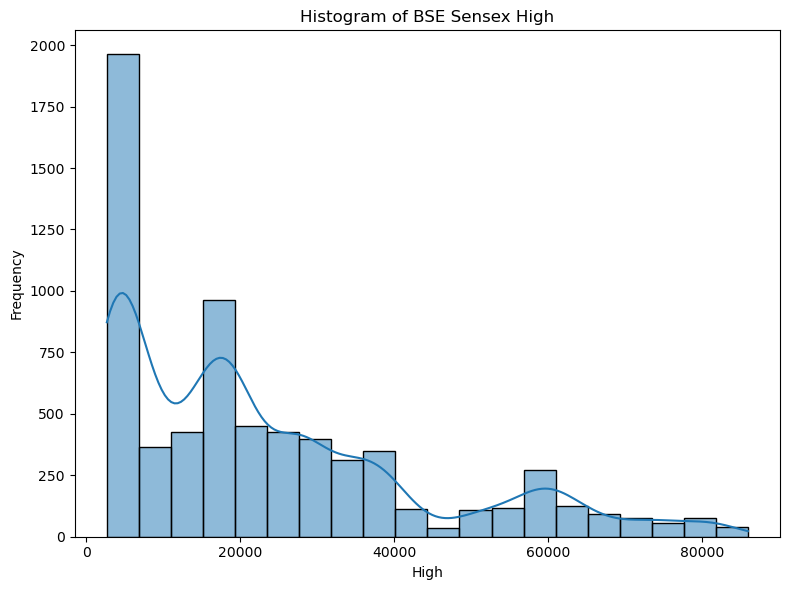

In [36]:
histogram_plot(all_index['^BSESN'], 'High', 'BSE Sensex')

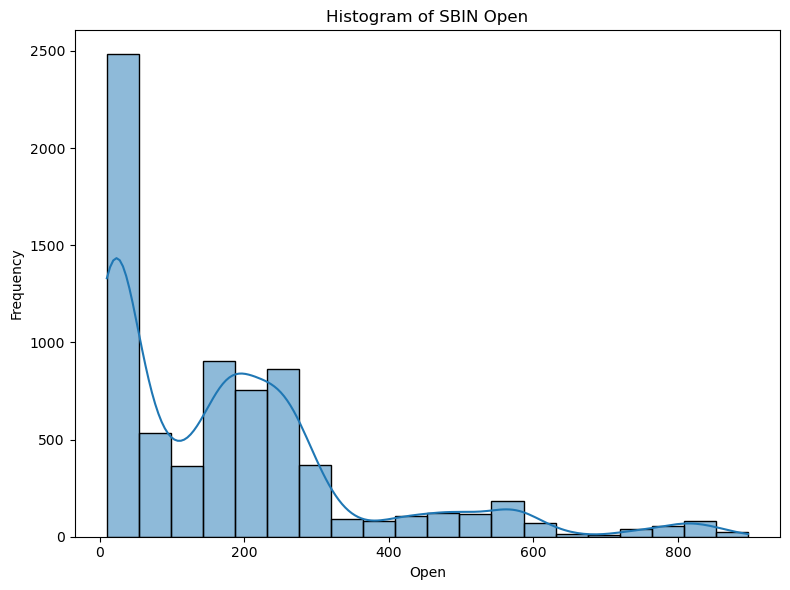

In [37]:
histogram_plot(all_nifty_50_stocks['SBIN.NS'], 'Open', 'SBIN')

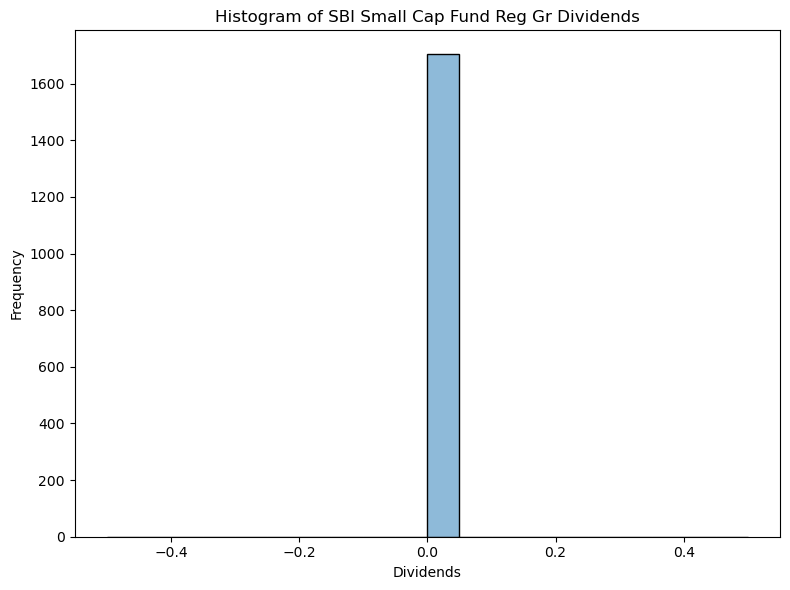

In [38]:
histogram_plot(all_mutual_funds['0P0000KV39.BO'], 'Dividends', 'SBI Small Cap Fund Reg Gr')

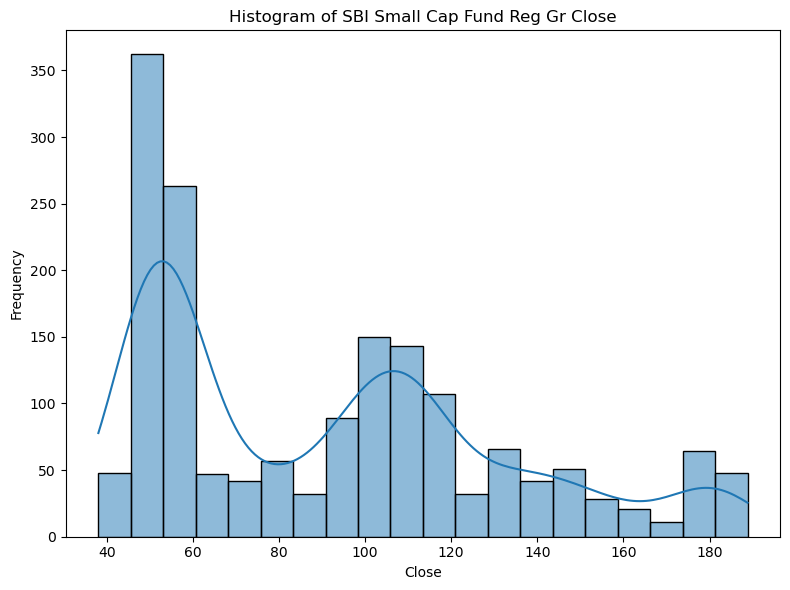

In [39]:
histogram_plot(all_mutual_funds['0P0000KV39.BO'], 'Close', 'SBI Small Cap Fund Reg Gr')

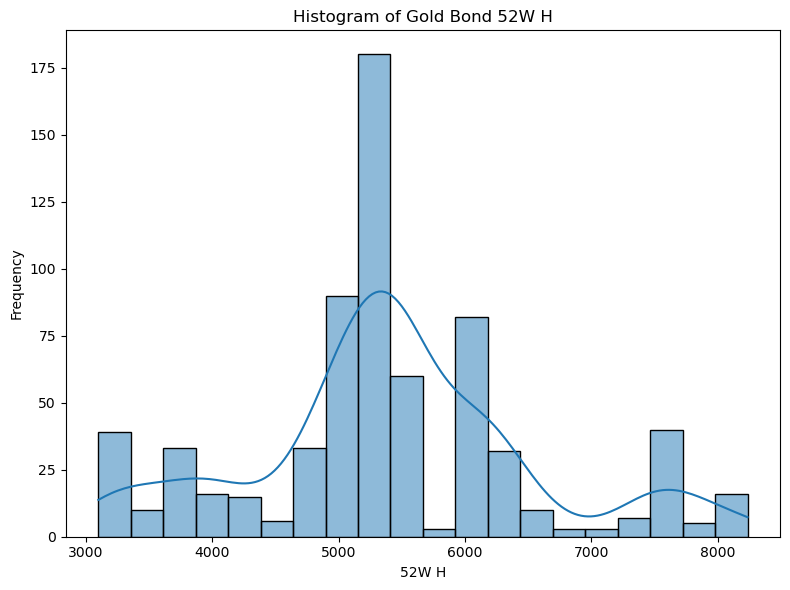

In [40]:
histogram_plot(GB_df_cleaned, '52W H', 'Gold Bond')

In [41]:
def scatter_plot(df, col_name1, col_name2, asset):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_name1], df[col_name2], alpha=0.7, color='orange')
    plt.title(f'Scatter plot of {col_name1} and {col_name2} of {asset}')
    plt.xlabel(col_name1)
    plt.ylabel(col_name2)
    plt.tight_layout()
    plt.show()

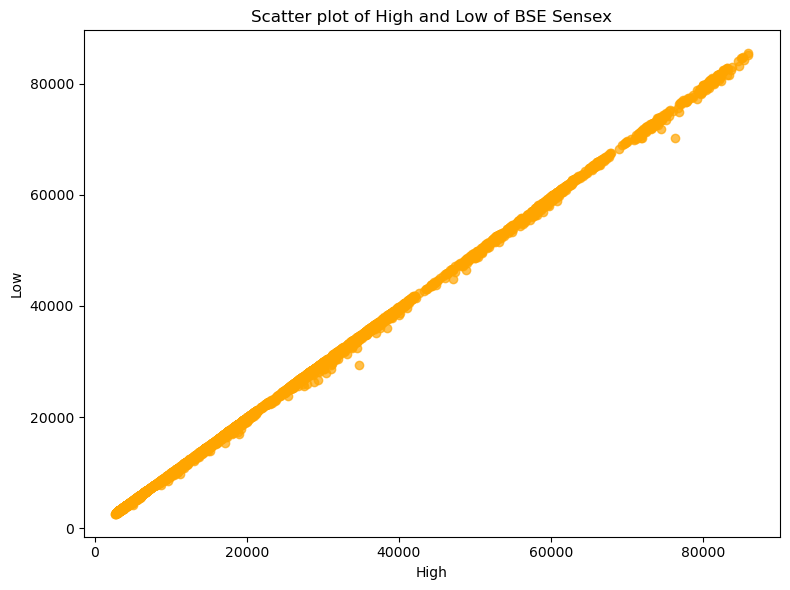

In [42]:
scatter_plot(all_index['^BSESN'], 'High', 'Low', 'BSE Sensex')

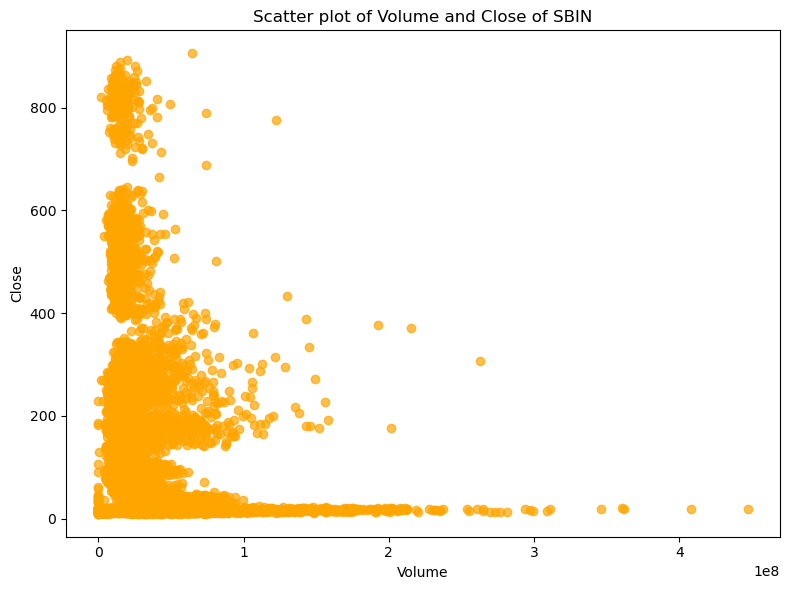

In [43]:
scatter_plot(all_nifty_50_stocks['SBIN.NS'], 'Volume', 'Close', 'SBIN')

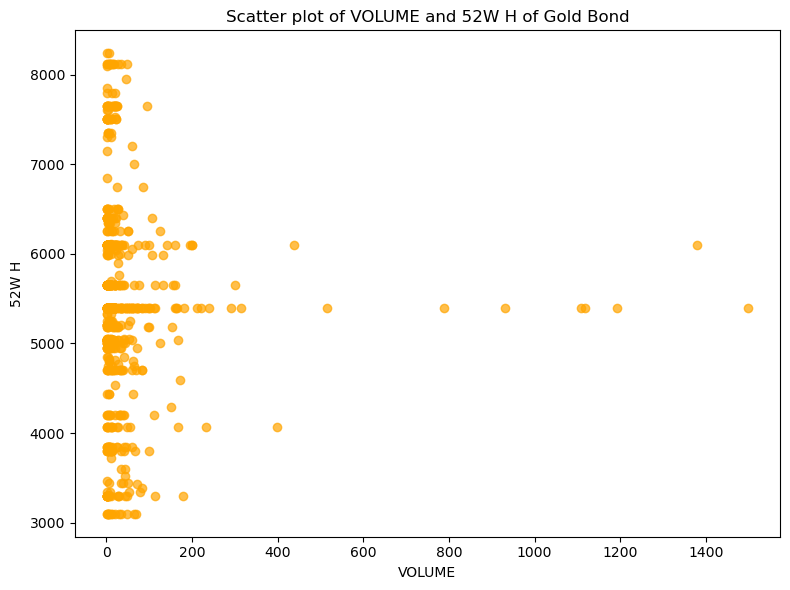

In [44]:
scatter_plot(GB_df_cleaned, 'VOLUME', '52W H', 'Gold Bond')

In [45]:
def correlation_matrix_plot(df, asset):
    correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.9, fmt=".2f")
    plt.title(f'Correlation Matrix of {asset}')
    plt.tight_layout()
    plt.show()

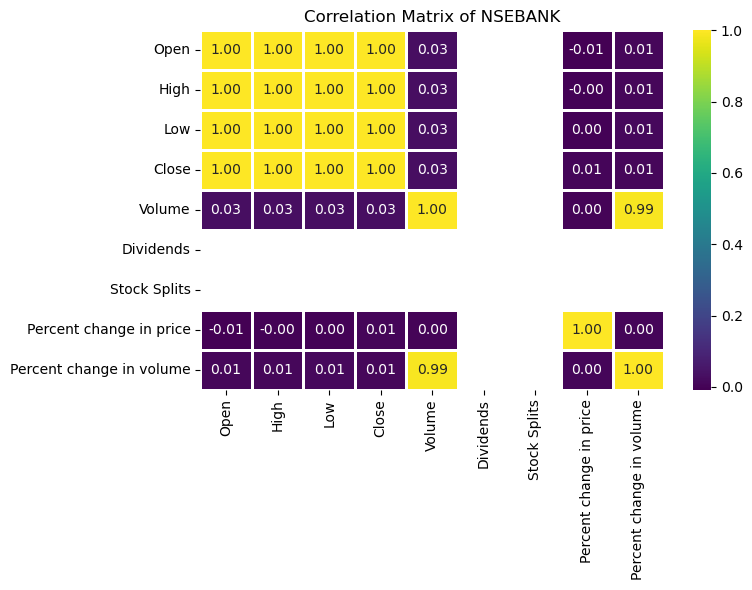

In [46]:
correlation_matrix_plot(all_index['^NSEBANK'], 'NSEBANK')

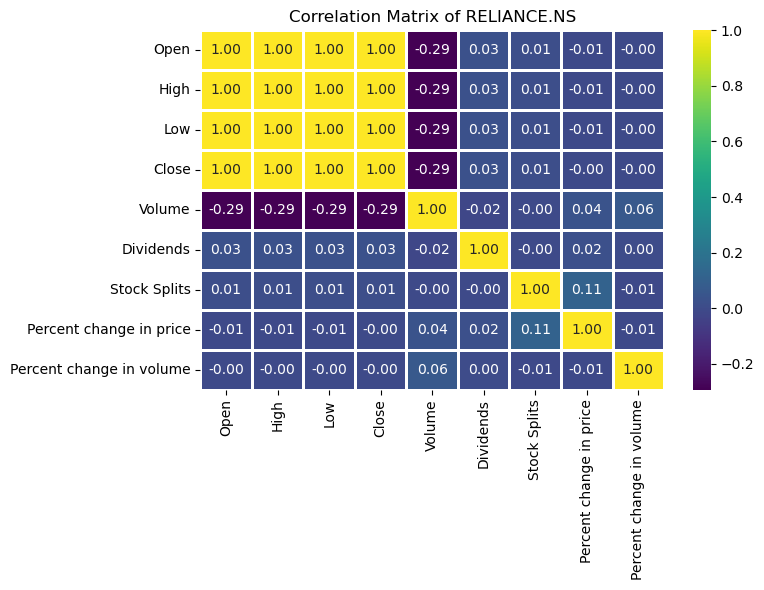

In [47]:
correlation_matrix_plot(all_nifty_50_stocks['RELIANCE.NS'], 'RELIANCE.NS')

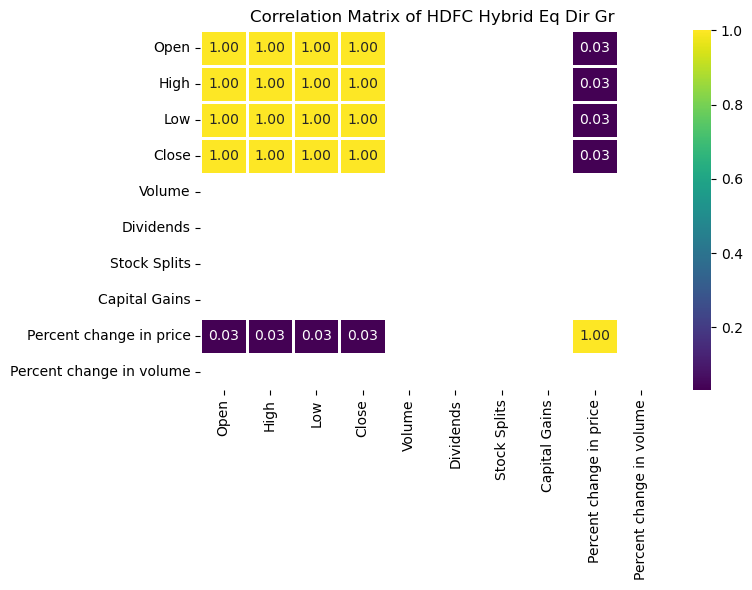

In [48]:
correlation_matrix_plot(all_mutual_funds['0P0001EI18.BO'], 'HDFC Hybrid Eq Dir Gr')

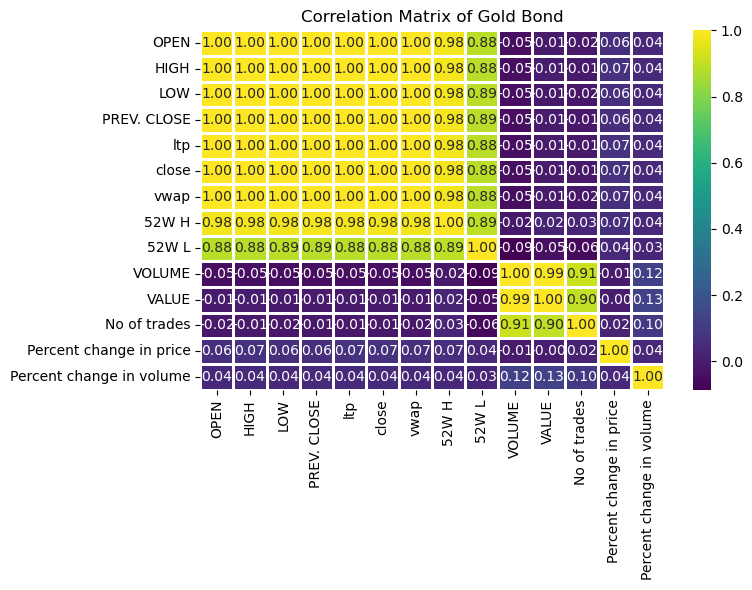

In [49]:
correlation_matrix_plot(GB_df_cleaned, 'Gold Bond')

# Create Excel file

In [50]:
index_excel_file = '../Data/Index_Data.xlsx'

with pd.ExcelWriter(index_excel_file) as writer:
    for ind, df in all_index.items():
        sheet_name = ind.replace("^", "").replace(".NS", "")
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [51]:
stocks_excel_file = '../Data/Stocks_Data.xlsx'

with pd.ExcelWriter(stocks_excel_file) as writer:
    for share, df in all_nifty_50_stocks.items():
        sheet_name = share.replace(".NS", "")
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [52]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'

with pd.ExcelWriter(mutual_funds_excel_file) as writer:
    for fund, df in all_mutual_funds.items():
        sheet_name = fund.replace(".NS", "").replace(".BO", "")
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [53]:
GB_df_cleaned.to_csv('../Data/Gold_Bonds.csv', index=False)
GB_df_cleaned.to_excel('../Data/Gold_Bond_Data.xlsx', sheet_name='Gold Bond', index=False)

fd_df.to_csv('../Data/FD_Returns.csv', index=False)
fd_df.to_excel('../Data/FD_Return_Data.xlsx', sheet_name='FD Return', index=False)